In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

In [2]:
#loading data file
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

#display top of dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Display the shape of dataset 
data.shape
print('The data set has ',data.shape[0],'rows and ',data.shape[1],'columns.')

The data set has  7043 rows and  21 columns.


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
## Checking for null values in attribute TotalCharges
print('Null values in attribute TotalCharges :',data['TotalCharges'].isnull().sum())

Null values in attribute TotalCharges : 0


In [6]:
## Checking for missing values in attribute TotalCharges

data[data['TotalCharges']==(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [8]:
## Checking for null values after replacing blank spaces with np.nan

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#COnverting Target variable from object type to float type.

data['TotalCharges']=data['TotalCharges'].astype(float)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

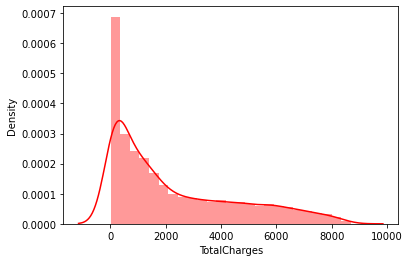

In [10]:
sns.distplot(data['TotalCharges'],color='r')

In [11]:
#Since the data in not normally distributed. 
## hence, replacing nan values with median.

data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())

In [12]:
## Checking for null values afterfilling null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
print('\n Unique values for attributes of dataset:\n')
data.apply(lambda x: len(x.unique()))


 Unique values for attributes of dataset:



customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
Catagorical_data=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
                  'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for cols in Catagorical_data:
    print('-----------',cols,'---------')
    print(data[cols].value_counts(),end="\n")
    print('\n')

----------- gender ---------
Male      3555
Female    3488
Name: gender, dtype: int64


----------- SeniorCitizen ---------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


----------- Partner ---------
No     3641
Yes    3402
Name: Partner, dtype: int64


----------- Dependents ---------
No     4933
Yes    2110
Name: Dependents, dtype: int64


----------- PhoneService ---------
Yes    6361
No      682
Name: PhoneService, dtype: int64


----------- MultipleLines ---------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


----------- InternetService ---------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


----------- OnlineSecurity ---------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


----------- OnlineBackup ---------
No                     3088
Yes                    2429
No internet service 

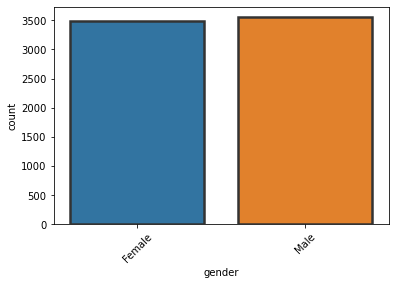

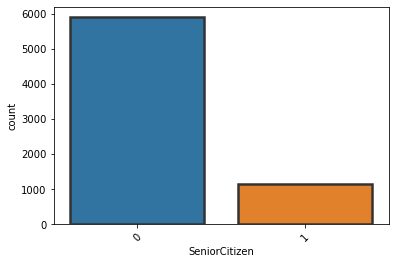

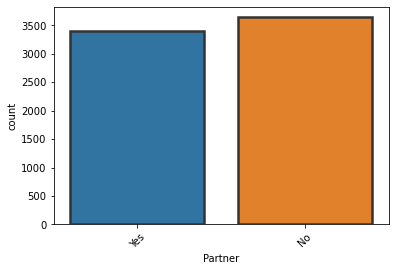

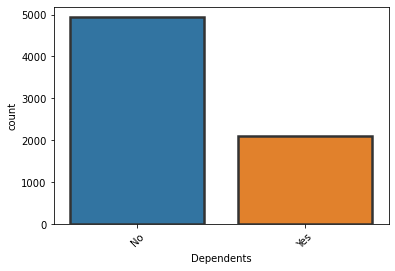

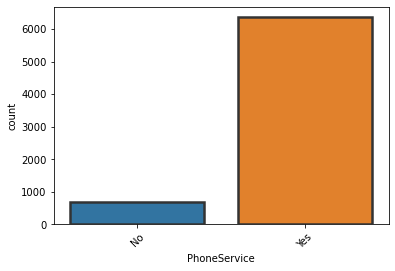

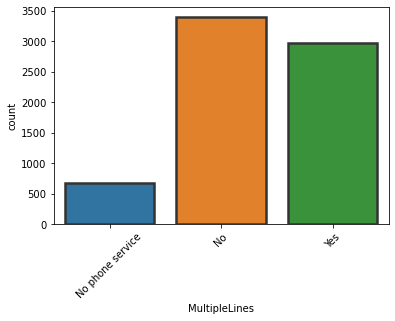

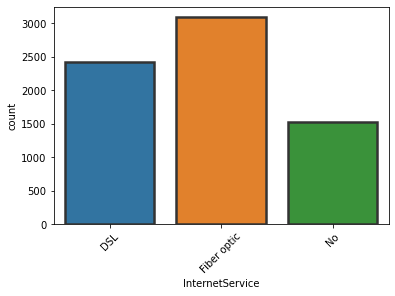

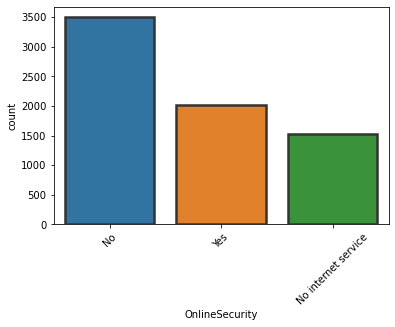

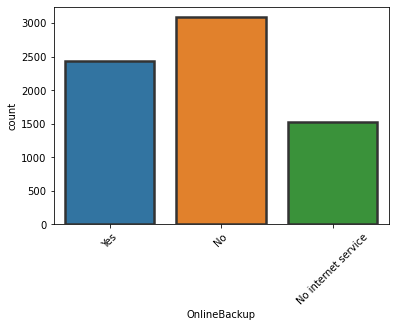

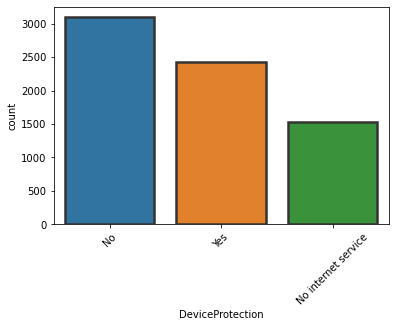

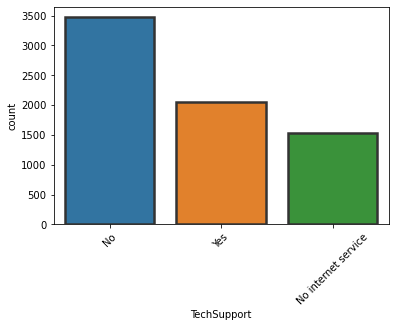

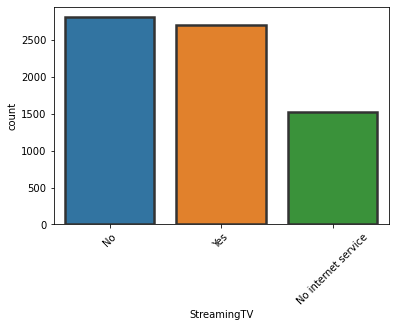

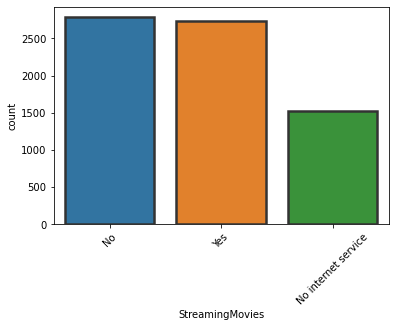

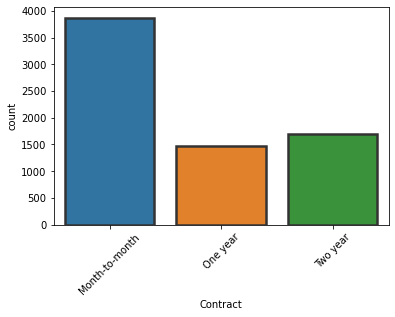

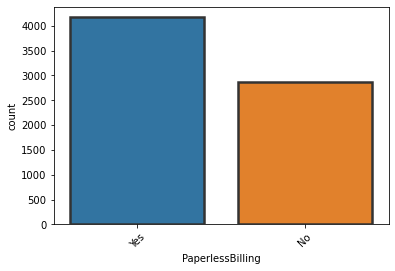

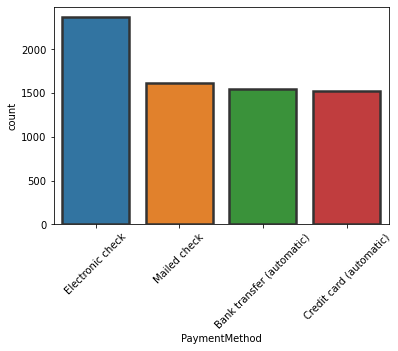

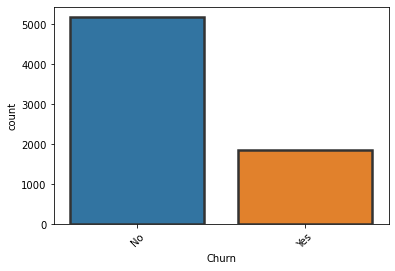

In [16]:
## Visulaization of catagorical data:
Catagorical_data=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
                  'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for i in Catagorical_data:
    sns.countplot(data[i],edgecolor=".2",linewidth=2.5)
    plt.xticks(rotation=45)
    plt.show()

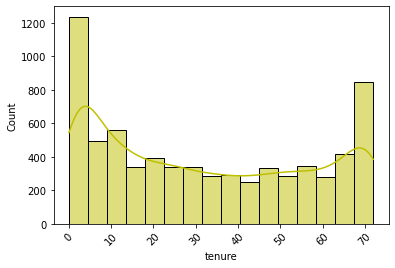

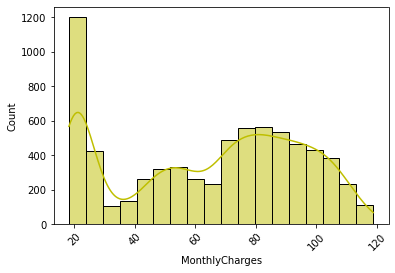

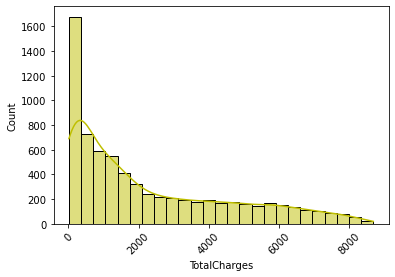

In [17]:
numeric_data=['tenure','MonthlyCharges','TotalCharges']
for i in numeric_data:
    sns.histplot(data[i],kde=True,color='y')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
#For analysis replacing churn values to numeric type.
#Replacing Yes to 1 and No to 0

data['Churn'] = data['Churn'].str.replace('No','0').str.replace('Yes','1')
data['Churn']=data['Churn'].astype(float)

Percentage of female customers who churned: 26.920871559633024
Percentage of male customers who churned: 26.160337552742618
--------------------------------------------------------------------------------------------------------------------
Percentage of female customers who didnot churned: 73.07912844036697
Percentage of male customers who didnot churned: 73.83966244725738


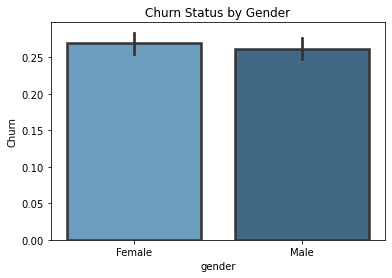

In [19]:
## Visulaization by comparing target variable with other variables.

sns.barplot(x="gender", y="Churn", data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender')

#print percentages 
print("Percentage of female customers who churned:", data["Churn"][data["gender"] == 'Female'].value_counts(normalize = True)[1]*100)
print("Percentage of male customers who churned:", data["Churn"][data["gender"] == 'Male'].value_counts(normalize = True)[1]*100)
print('--------------------------------------------------------------------------------------------------------------------')
print("Percentage of female customers who didnot churned:", data["Churn"][data["gender"] == 'Female'].value_counts(normalize = True)[0]*100)
print("Percentage of male customers who didnot churned:", data["Churn"][data["gender"] == 'Male'].value_counts(normalize = True)[0]*100)

Percentage of SeniorCitizens who got churned: 41.68126094570928
Percentage of SeniorCitizens who didnot got churned: 58.31873905429072


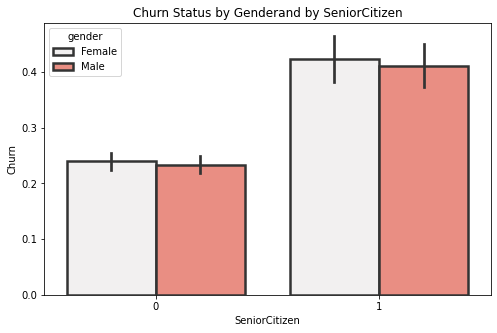

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x="SeniorCitizen", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Genderand by SeniorCitizen')

#print percentages 
print("Percentage of SeniorCitizens who got churned:", data["Churn"][data["SeniorCitizen"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SeniorCitizens who didnot got churned:", data["Churn"][data["SeniorCitizen"] == 1].value_counts(normalize = True)[0]*100)

Percentage of Partnered customers who didnot got churned: 80.33509700176367
Percentage of Partnered customers who got churned: 19.66490299823633
-------------------------------------------------------------------------------------------------------------------
Percentage of customers not partnered and got churned: 32.95797857731392
Percentage of customers not partnered and didnot got churned: 67.04202142268608


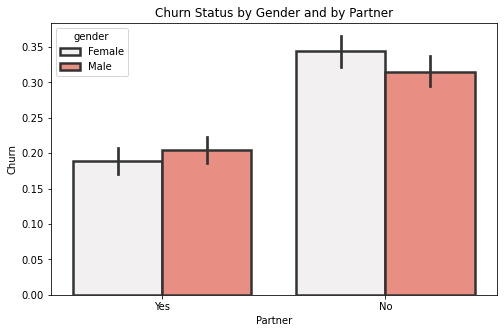

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x="Partner", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by Partner')

#print percentages 
print("Percentage of Partnered customers who didnot got churned:", data["Churn"][data["Partner"] == 'Yes'].value_counts(normalize = True)[0]*100)
print("Percentage of Partnered customers who got churned:", data["Churn"][data["Partner"] == 'Yes'].value_counts(normalize = True)[1]*100)
print('-------------------------------------------------------------------------------------------------------------------')
print("Percentage of customers not partnered and got churned:", data["Churn"][data["Partner"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not partnered and didnot got churned:", data["Churn"][data["Partner"] == 'No'].value_counts(normalize = True)[0]*100)

Percentage of customers using Phone service who didnot got churned: 73.29036315044804
Percentage of customers using Phone service who got churned: 26.70963684955196
-----------------------------------------------------------------------------------------------------------------
Percentage of customers not using Phone service who didnot got churned: 75.0733137829912
Percentage of customers not using Phone service who got churned: 24.926686217008797


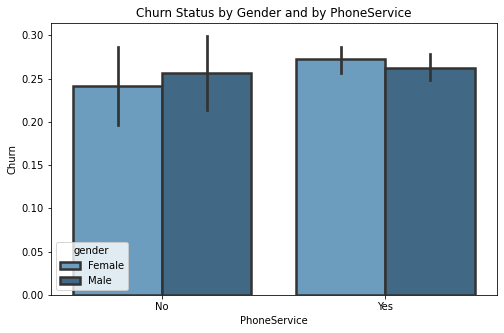

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x="PhoneService", y="Churn", hue='gender',data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by PhoneService')

#print percentages 
print("Percentage of customers using Phone service who didnot got churned:", data["Churn"][data["PhoneService"] == 'Yes'].value_counts(normalize = True)[0]*100)
print("Percentage of customers using Phone service who got churned:", data["Churn"][data["PhoneService"] == 'Yes'].value_counts(normalize = True)[1]*100)
print('-----------------------------------------------------------------------------------------------------------------')
print("Percentage of customers not using Phone service who didnot got churned:", data["Churn"][data["PhoneService"] == 'No'].value_counts(normalize = True)[0]*100)
print("Percentage of customers not using Phone service who got churned:", data["Churn"][data["PhoneService"] == 'No'].value_counts(normalize = True)[1]*100)

Percentage of customers using Fiber optic who got churned: 41.89276485788114
Percentage of customers using DSL who got churned: 18.95910780669145
Percentage of customers not using Internet service who got churned: 7.404980340760157


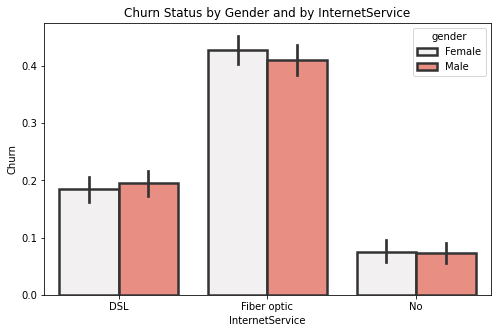

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x="InternetService", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by InternetService')

#print percentages 
print("Percentage of customers using Fiber optic who got churned:", data["Churn"][data["InternetService"] == 'Fiber optic'].value_counts(normalize = True)[1]*100)
print("Percentage of customers using DSL who got churned:", data["Churn"][data["InternetService"] == 'DSL'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using Internet service who got churned:", data["Churn"][data["InternetService"] == 'No'].value_counts(normalize = True)[1]*100)


Percentage of customers using OnlineSecurity who got churned: 14.611193660227837
Percentage of customers not using OnlineSecurity who got churned: 41.76672384219554
Percentage of customers not having internet service who got churned: 7.404980340760157


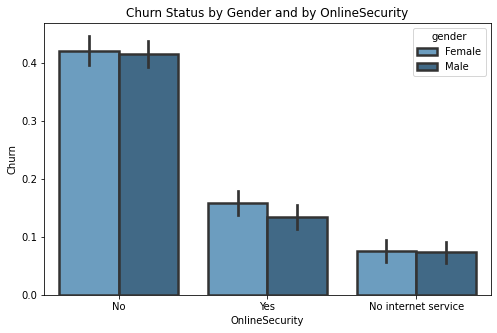

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="OnlineSecurity", y="Churn", hue='gender',data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by OnlineSecurity')

#print percentages 
print("Percentage of customers using OnlineSecurity who got churned:", data["Churn"][data["OnlineSecurity"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using OnlineSecurity who got churned:", data["Churn"][data["OnlineSecurity"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not having internet service who got churned:", data["Churn"][data["OnlineSecurity"] == 'No internet service'].value_counts(normalize = True)[1]*100)


Percentage of customers using OnlineBackup who got churned: 21.531494442157268
Percentage of customers not using OnlineBackup who got churned: 39.92875647668394
Percentage of customers not having internet service who got churned: 7.404980340760157


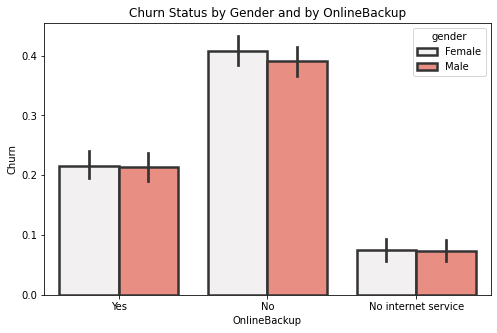

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x="OnlineBackup", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by OnlineBackup')

#print percentages 
print("Percentage of customers using OnlineBackup who got churned:", data["Churn"][data["OnlineBackup"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using OnlineBackup who got churned:", data["Churn"][data["OnlineBackup"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not having internet service who got churned:", data["Churn"][data["OnlineBackup"] == 'No internet service'].value_counts(normalize = True)[1]*100)


Percentage of customers using DeviceProtection who got churned: 22.50206440957886
Percentage of customers not using DeviceProtection who got churned: 39.127625201938606
Percentage of customers not having internet service who got churned: 7.404980340760157


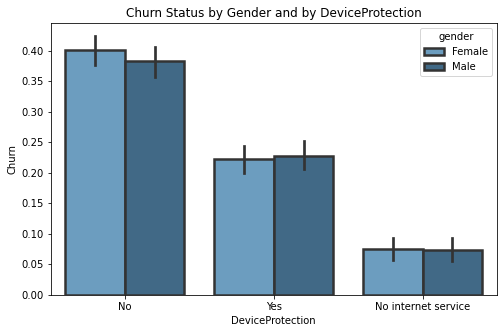

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x="DeviceProtection", y="Churn", hue='gender',data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by DeviceProtection')

#print percentages 
print("Percentage of customers using DeviceProtection who got churned:", data["Churn"][data["DeviceProtection"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using DeviceProtection who got churned:", data["Churn"][data["DeviceProtection"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not having internet service who got churned:", data["Churn"][data["DeviceProtection"] == 'No internet service'].value_counts(normalize = True)[1]*100)


Percentage of customers using TechSupport who got churned: 15.166340508806261
Percentage of customers not using TechSupport who got churned: 41.63547365390153
Percentage of customers not having internet service who got churned: 7.404980340760157


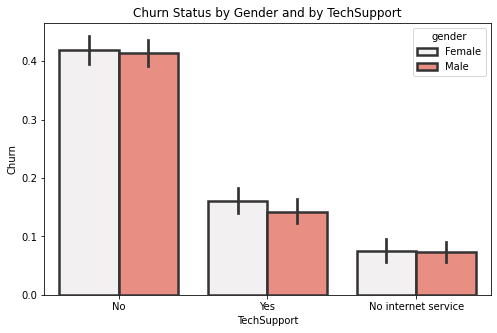

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="TechSupport", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by TechSupport')

#print percentages 
print("Percentage of customers using TechSupport who got churned:", data["Churn"][data["TechSupport"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using TechSupport who got churned:", data["Churn"][data["TechSupport"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not having internet service who got churned:", data["Churn"][data["TechSupport"] == 'No internet service'].value_counts(normalize = True)[1]*100)


Percentage of customers using StreamingTV who got churned: 30.070188400443293
Percentage of customers not using StreamingTV who got churned: 33.52313167259787
Percentage of customers not having internet service who got churned: 7.404980340760157


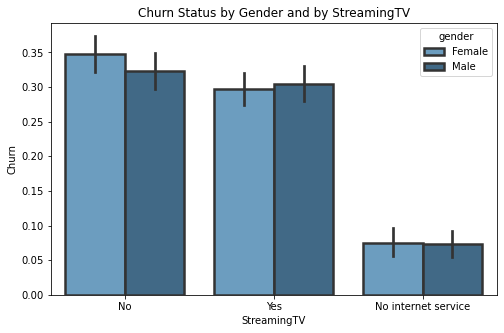

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x="StreamingTV", y="Churn", hue='gender',data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by StreamingTV')

#print percentages 
print("Percentage of customers using StreamingTV who got churned:", data["Churn"][data["StreamingTV"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using StreamingTV who got churned:", data["Churn"][data["StreamingTV"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not having internet service who got churned:", data["Churn"][data["StreamingTV"] == 'No internet service'].value_counts(normalize = True)[1]*100)

Percentage of customers using StreamingMovies who got churned: 29.941434846266475
Percentage of customers not using StreamingMovies who got churned: 33.680430879712745
Percentage of customers not having internet service who got churned: 7.404980340760157


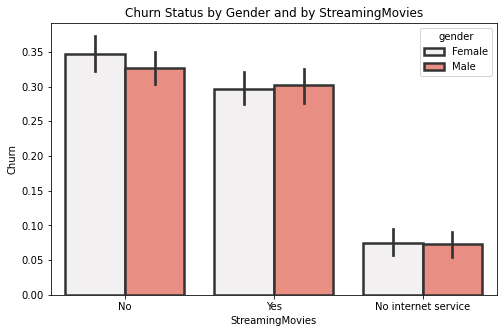

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x="StreamingMovies", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by StreamingMovies')

#print percentages 
print("Percentage of customers using StreamingMovies who got churned:", data["Churn"][data["StreamingMovies"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using StreamingMovies who got churned:", data["Churn"][data["StreamingMovies"] == 'No'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not having internet service who got churned:", data["Churn"][data["StreamingMovies"] == 'No internet service'].value_counts(normalize = True)[1]*100)


Percentage of customers having month-to-month contarct & got churned: 42.70967741935484
Percentage of customers having Two year contarct & got churned: 2.831858407079646
Percentage of customers having one year contarct & got churned: 11.269517990495586


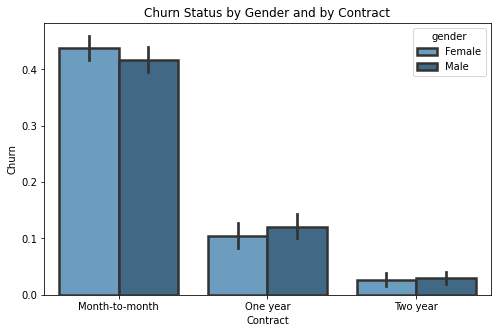

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x="Contract", y="Churn", hue='gender',data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by Contract')

#print percentages 
print("Percentage of customers having month-to-month contarct & got churned:", data["Churn"][data["Contract"] == 'Month-to-month'].value_counts(normalize = True)[1]*100)
print("Percentage of customers having Two year contarct & got churned:", data["Churn"][data["Contract"] == 'Two year'].value_counts(normalize = True)[1]*100)
print("Percentage of customers having one year contarct & got churned:", data["Churn"][data["Contract"] == 'One year'].value_counts(normalize = True)[1]*100)

Percentage of customers using PaperlessBilling who got churned: 33.565092304003834
Percentage of customers not using PaperlessBilling who got churned: 16.33008356545961


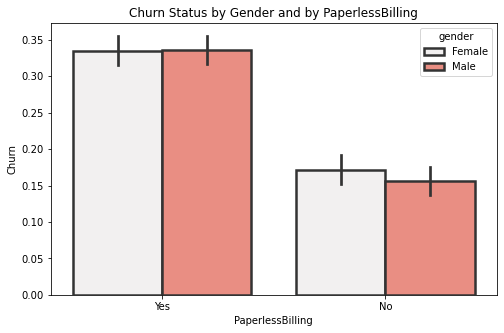

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x="PaperlessBilling", y="Churn", hue='gender',data=data,color="salmon",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by PaperlessBilling')

#print percentages 
print("Percentage of customers using PaperlessBilling who got churned:", data["Churn"][data["PaperlessBilling"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of customers not using PaperlessBilling who got churned:", data["Churn"][data["PaperlessBilling"] == 'No'].value_counts(normalize = True)[1]*100)


Percentage of customers paying through Electronic Check & got churned: 45.28541226215645
Percentage of customers paying through Mailed check & got churned: 19.106699751861044
Percentage of customers paying through Bank transfer (automatic) & got churned: 16.709844559585495
Percentage of customers paying through Credit card (automatic) & got churned: 15.243101182654403


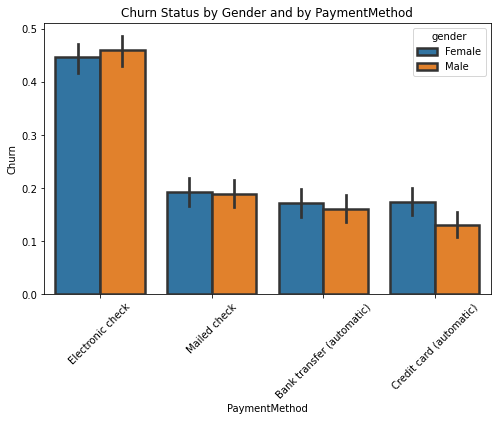

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x="PaymentMethod", y="Churn", hue='gender',data=data,errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Churn Status by Gender and by PaymentMethod')
plt.xticks(rotation=45)

#print percentages 
print("Percentage of customers paying through Electronic Check & got churned:", data["Churn"][data["PaymentMethod"] == 'Electronic check'].value_counts(normalize = True)[1]*100)
print("Percentage of customers paying through Mailed check & got churned:", data["Churn"][data["PaymentMethod"] == 'Mailed check'].value_counts(normalize = True)[1]*100)
print("Percentage of customers paying through Bank transfer (automatic) & got churned:", data["Churn"][data["PaymentMethod"] == 'Bank transfer (automatic)'].value_counts(normalize = True)[1]*100)
print("Percentage of customers paying through Credit card (automatic) & got churned:", data["Churn"][data["PaymentMethod"] == 'Credit card (automatic)'].value_counts(normalize = True)[1]*100)

In [33]:
#Encoding of DataFrame

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [34]:
print('Data types of dataset after applying ordinal encoding ---->\n')
data.dtypes

Data types of dataset after applying ordinal encoding ---->



customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [35]:
#Statistical Summary
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [36]:
# Checking for Correlation 
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000019,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309


<AxesSubplot:>

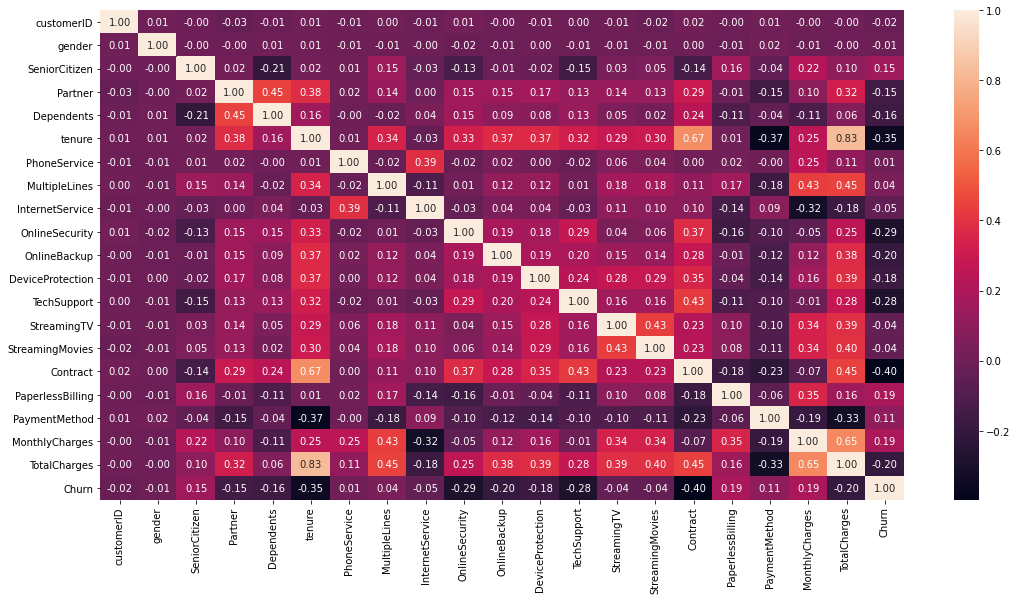

In [37]:
#Visulaization of Correlation
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),linecolor='white',annot=True,fmt='0.2f')

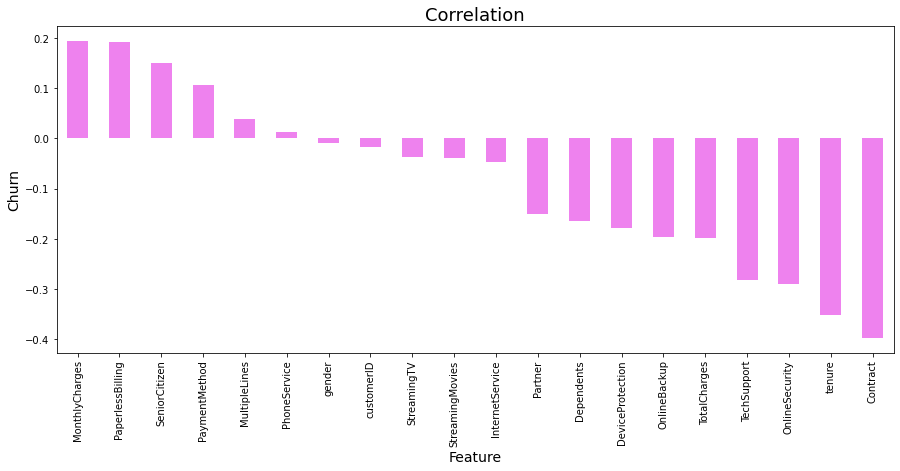

In [38]:
#Visualization of correlation of target variable with other variables
plt.figure(figsize=(15,6))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='violet')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Churn',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

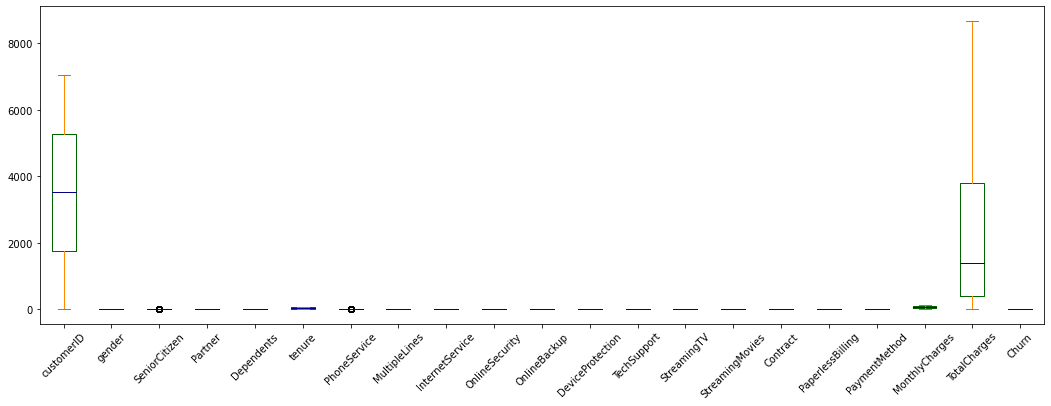

In [39]:
#Checking for Outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot(kind='box', color=color,figsize=(18,7))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

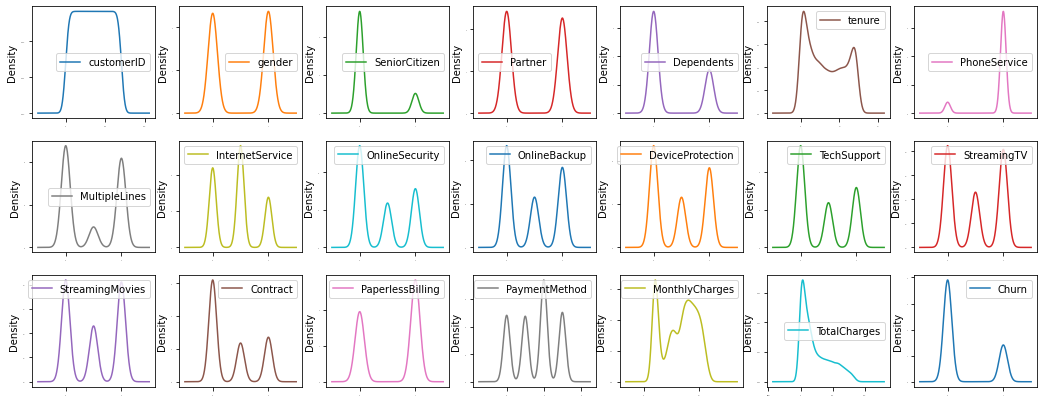

In [40]:
### Density visualisation for all attributes

data.plot(kind='density',layout=(3,7),sharex=False,sharey=False,subplots=True,grid=False,fontsize=1,figsize=(18,7))

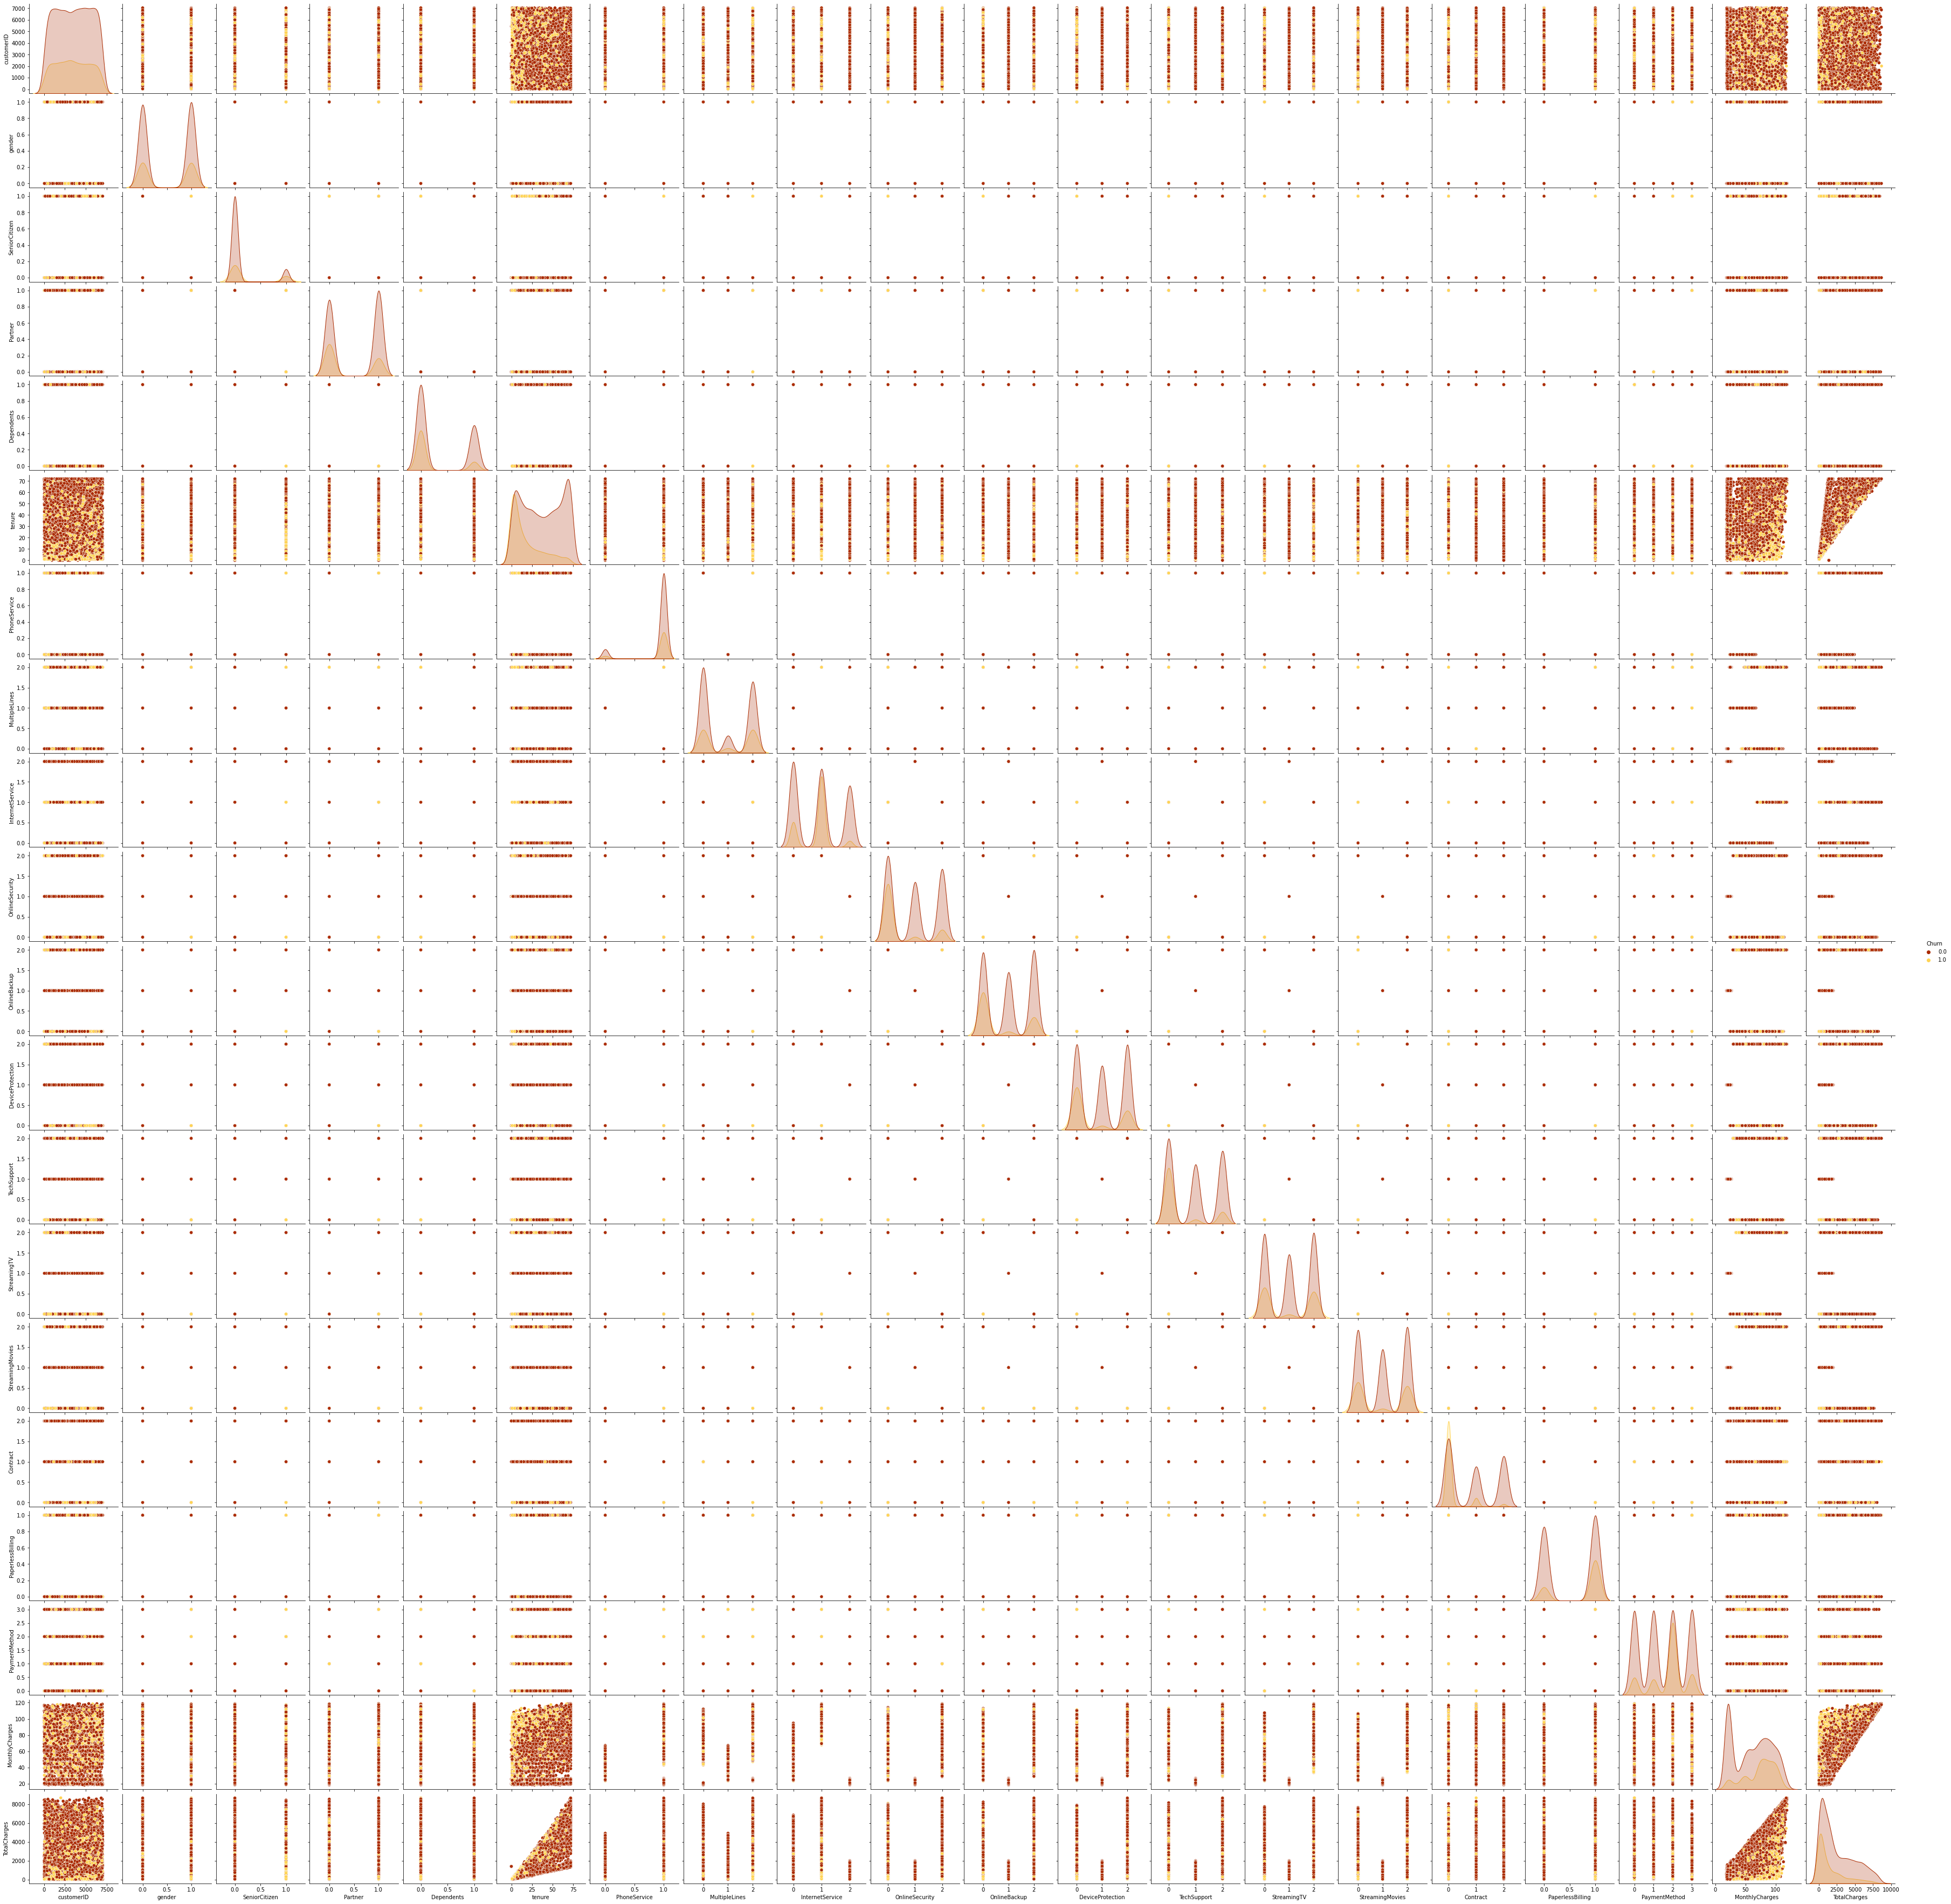

In [48]:
sns.pairplot(data,hue='Churn',palette='afmhot')

<AxesSubplot:xlabel='Churn', ylabel='count'>

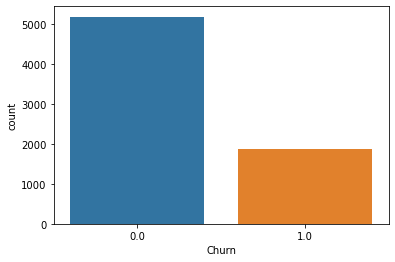

In [49]:
sns.countplot(x='Churn',data=data)

In [50]:
#Splitting the data inrto train and test

x=data.drop(['customerID','Churn'],axis=1)
y=data['Churn']

In [51]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

1.0    5174
0.0    5174
Name: Churn, dtype: int64


<AxesSubplot:>

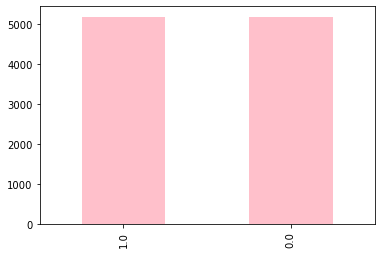

In [52]:
print(y_over.value_counts())
y_over.value_counts().plot(kind='bar',color='pink')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [54]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    dtc_Accu=accuracy_score(y_test,pred_test)
    if dtc_Accu>maxAccu:
        maxAccu=dtc_Accu
        maxRS=i
print('Best Accuracy is : ',maxAccu*100,'on random state :' ,maxRS)

Best Accuracy is :  81.99677938808374 on random state : 56


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=56)

In [57]:
print('Shape of original dataset :',data.shape)
print('Shape of x_over:',x_over.shape)
print('Shape of y_over:',y_over.shape)
print('Shape of input - training set :', x_train.shape)
print('Shape of output - training set :', y_train.shape)
print('Shape of input - testing set :', x_test.shape)
print('Shape of output - testing set :', y_test.shape)

Shape of original dataset : (7043, 21)
Shape of x_over: (10348, 19)
Shape of y_over: (10348,)
Shape of input - training set : (7243, 19)
Shape of output - training set : (7243,)
Shape of input - testing set : (3105, 19)
Shape of output - testing set : (3105,)


In [58]:
models = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Extratrees :',ExtraTreesClassifier()],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors = 2)],
               ['SVM :', SVC()],
               ['NB :' , GaussianNB()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['Xgboost: ', XGBClassifier()]]

In [59]:
print("Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (accuracy_score(y_test, predictions))*100)

Accuracy Score----->


DecisionTree : 81.67471819645733
RandomForest : 86.66666666666667
Extratrees : 86.60225442834138
KNeighbours : 75.81320450885669
SVM : 65.70048309178745
NB : 76.32850241545893
AdaBoostClassifier : 85.73268921095008
GradientBoostingClassifier:  86.89210950080515
[20:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  86.9243156199678


In [60]:
print("f1_score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (f1_score(y_test, predictions))*100)

f1_score----->


DecisionTree : 81.37030995106036
RandomForest : 86.15894039735099
Extratrees : 86.07178136318736
KNeighbours : 74.02282947077136
SVM : 63.339070567986234
NB : 76.89405847217856
AdaBoostClassifier : 85.80583146427426
GradientBoostingClassifier:  86.76184295911747
[20:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  86.68852459016392


In [61]:
print("Confusion Matrix----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name,'\n', (confusion_matrix(y_test, predictions))*100)

Confusion Matrix----->


DecisionTree : 
 [[129500  26200]
 [ 30500 124300]]
RandomForest : 
 [[138500  17200]
 [ 24200 130600]]
Extratrees : 
 [[137200  18500]
 [ 22700 132100]]
KNeighbours : 
 [[128400  27300]
 [ 47800 107000]]
SVM : 
 [[112000  43700]
 [ 62800  92000]]
NB : 
 [[114700  41000]
 [ 32500 122300]]
AdaBoostClassifier : 
 [[132300  23400]
 [ 20900 133900]]
GradientBoostingClassifier:  
 [[136200  19500]
 [ 21100 133700]]
[20:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  
 [[137700  18000]
 [ 22600 132200]]


In [62]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x_over,y_over,cv=5)
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean()*100,result.std())
    print(result)

Cross_val_scores:


DecisionTree : : 80.181212 (0.092977)
RandomForest : : 84.269205 (0.103996)
Extratrees : : 84.732871 (0.092476)
KNeighbours : : 77.657656 (0.010308)
SVM : : 65.925932 (0.007989)
NB : : 76.237268 (0.013886)
AdaBoostClassifier : : 83.196097 (0.076093)
GradientBoostingClassifier:  : 83.824532 (0.092044)
[20:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:42] WARNING: C:/Users/Administrator/workspace/xgboo

In [63]:
#Gradient Boosting Classifier
##importing library
from sklearn.model_selection import GridSearchCV

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]}

#Create new GBR object
gbr_2 = GradientBoostingClassifier()

#Use GridSearch
GCV = GridSearchCV(gbr_2, ex_param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [64]:
#Creating Final Model after hyperparameter tuning for GradientBoostingClassifier

f_mod_gbc= GradientBoostingClassifier(max_depth=None,max_features=3,min_samples_split=2,
                                min_samples_leaf=1)
f_mod_gbc.fit(x_train, y_train)

y_pred = f_mod_gbc.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for GradientBoostingClassifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_gbc, x_over, y_over, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

classification_report 
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1557
         1.0       0.88      0.84      0.86      1548

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[1376  181]
 [ 253 1295]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for GradientBoostingClassifier is : 0.8602254428341385
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Model accuracy:  83.79572385548808


### Model Acuracy after hyper parameter tuning is 83.79%

AUC-ROC score of GradientBoostingClassifier: 0.8601570551597436
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


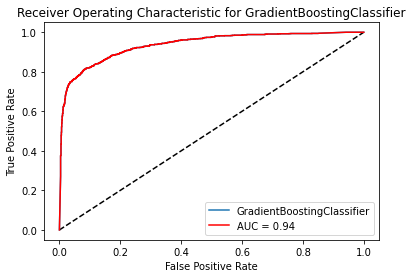

In [65]:
## Checking fro AUC-ROC Score

y_prob=f_mod_gbc.predict_proba(x_test)[:,1] 
pred=f_mod_gbc.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of GradientBoostingClassifier:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for GradientBoostingClassifier')
plt.show()

### AUC score of model is 94%

In [66]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_gbc,'customer_churn_gbc.obj')

['customer_churn_gbc.obj']